<a href="https://colab.research.google.com/github/LeMinhTruong16/AI/blob/main/Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
#tải tập dữ liệu hình ảnh, chuyển đổi chúng thành mảng NumPy,
#và lưu các mảng này vào đĩa để sử dụng trong quá trình đào tạo hoặc kiểm tra mô hình.
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array

In [69]:
# kết nối với Google Drive trong môi trường Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
# đoạn mã này được sử dụng để tải các tệp ảnh và nhãn tương ứng từ thư mục trên Google Drive
# chuẩn bị chúng cho việc huấn luyện mô hình học máy.
folder = '/content/drive/MyDrive/AI /FLOWER_Truong/FLOWER/'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('ROSE'):
    output= 1.0
  if file.startswith('DANDELION'):
    output= 2.0
  if file.startswith('DAISY'):
    output= 3.0
  if file.startswith('TULIP'):
    output= 4.0
  if file.startswith('SUNFLOWER'):
    output= 5.0
  photo = load_img(folder + file, target_size= (40,40))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

In [71]:
# lưu trữ các mảng numpy photos và labels
photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
!mkdir /content/drive/MyDrive/Colab\ Notebooks/Data
save('/content/drive/MyDrive/Colab Notebooks/Data/flower_photos.npy', photos)
save('/content/drive/MyDrive/Colab Notebooks/Data/flower_labels.npy', labels)

(4316, 40, 40, 3) (4316,)
mkdir: cannot create directory ‘/content/drive/MyDrive/Colab Notebooks/Data’: File exists


In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
split_index = int(0.05 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]

In [44]:
print(test_x.shape, train_x.shape)

(215, 40, 40, 3) (4101, 40, 40, 3)


In [74]:
#về khoảng giá trị từ 0 đến 1 bằng cách chia tất cả các giá trị pixel cho 255
train_x = train_x.reshape((4101, 40, 40, 3))
train_x = train_x.astype('float32')/255

test_x = test_x.reshape((215, 40, 40, 3))
test_x = test_x.astype('float32')/255

In [75]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,6)
test_y = to_categorical(test_y,6)

In [82]:
# khai báo các thành phần cần thiết để xây dựng một mô hình mạng neural 
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 64
epochs = 10
classes = 6


In [83]:
# khởi tạo một mô hình mạng neural convolutional (CNN) 
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (40, 40, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(1024, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [84]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(1024, activation = 'linear'))

model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 40, 40, 32)        896       
                                                                 
 leaky_re_lu_48 (LeakyReLU)  (None, 40, 40, 32)        0         
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 20, 20, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 20, 20, 64)        18496     
                                                                 
 conv2d_58 (Conv2D)          (None, 20, 20, 64)        36928     
                                                                 
 leaky_re_lu_49 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                      

In [85]:
#Compile:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs, verbose= 1)


Epoch 1/10
65/65 [==============================] - 5s 19ms/step - loss: 1.5330 - accuracy: 0.3107
Epoch 2/10
65/65 [==============================] - 1s 18ms/step - loss: 1.1975 - accuracy: 0.4982
Epoch 3/10
65/65 [==============================] - 1s 18ms/step - loss: 1.0179 - accuracy: 0.5996
Epoch 4/10
65/65 [==============================] - 1s 17ms/step - loss: 0.8626 - accuracy: 0.6684
Epoch 5/10
65/65 [==============================] - 1s 18ms/step - loss: 0.8139 - accuracy: 0.6784
Epoch 6/10
65/65 [==============================] - 1s 18ms/step - loss: 0.6802 - accuracy: 0.7420
Epoch 7/10
65/65 [==============================] - 1s 18ms/step - loss: 0.5939 - accuracy: 0.7796
Epoch 8/10
65/65 [==============================] - 1s 18ms/step - loss: 0.5209 - accuracy: 0.8061
Epoch 9/10
65/65 [==============================] - 1s 18ms/step - loss: 0.3659 - accuracy: 0.8617
Epoch 10/10
65/65 [==============================] - 1s 18ms/step - loss: 0.2618 - accuracy: 0.9047


In [86]:
#Đoạn code này đánh giá độ chính xác của mô hình
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

7/7 [==============================] - 0s 8ms/step - loss: 1.3443 - accuracy: 0.6651
Test accuracy: 0.6651162505149841


In [87]:
model.save('/content/drive/MyDrive/Colab Notebooks/Data/flowers.h5')

1/1 [==============================] - 0s 33ms/step
SUNFLOWER


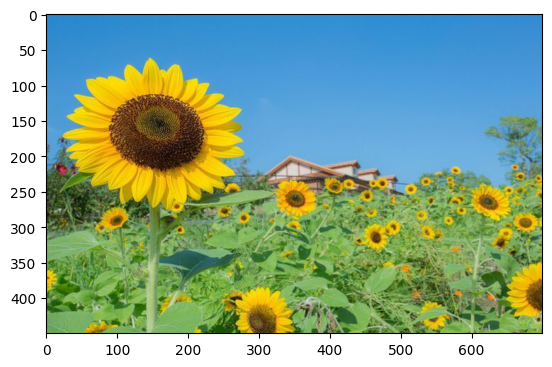

1/1 [==============================] - 0s 45ms/step
DAISY


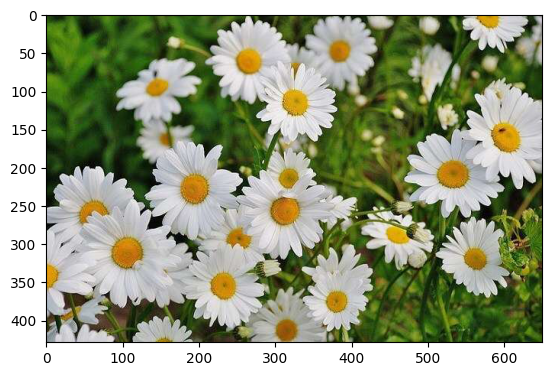

1/1 [==============================] - 0s 32ms/step
ROSE


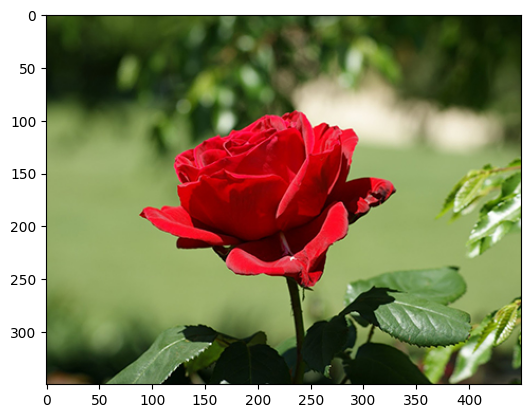

1/1 [==============================] - 0s 23ms/step
DAISY


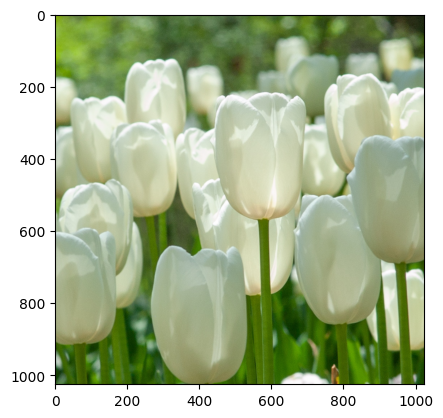

1/1 [==============================] - 0s 21ms/step
DANDELION


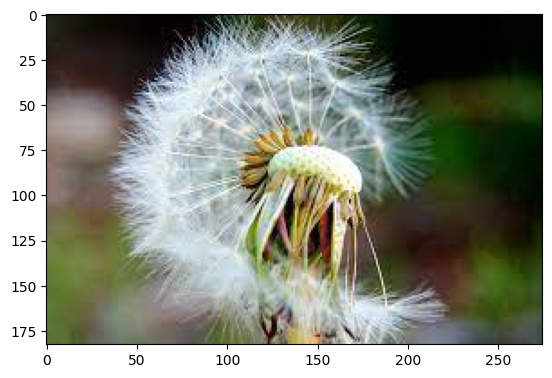

In [95]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/AI /AnhTest/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)
  
  photo = load_img(folder +   file, target_size = (40, 40))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  class_name=['','ROSE', 'DANDELION', 'DAISY', 'TULIP', 'SUNFLOWER']
  print(class_name[result])
  plt.show()